In [1]:
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_feather('mined_data.feather')

df.drop(['order_id', 'days_since_prior_order', 
         'order_number', 'order_dow', 'order_hour_of_day',
         'reordered', 'product_name', 'days_since_user_first_order'], axis=1, inplace=True)

df = df[df['days_since_user_ordered_product'] >= 0]

df['reordered_within_30_days'] = (df['days_since_user_ordered_product'] <= 30).astype(int)
df['reordered_within_14_days'] = (df['days_since_user_ordered_product'] <= 14).astype(int)


train, test = train_test_split(df, test_size=0.2, random_state=62)

y_14 = test['reordered_within_14_days']
y_30 = test['reordered_within_30_days']

# Load our computed probabilities

with open('lg_14_probs.pkl', 'rb') as f:
    lg_14_probs = pickle.load(f)
    
with open('lg_30_probs.pkl', 'rb') as f:
    lg_30_probs = pickle.load(f)
    
with open('xg_14_probs.pkl', 'rb') as f:
    xg_14_probs = pickle.load(f)
    
with open('xg_30_probs.pkl', 'rb') as f:
    xg_30_probs = pickle.load(f)

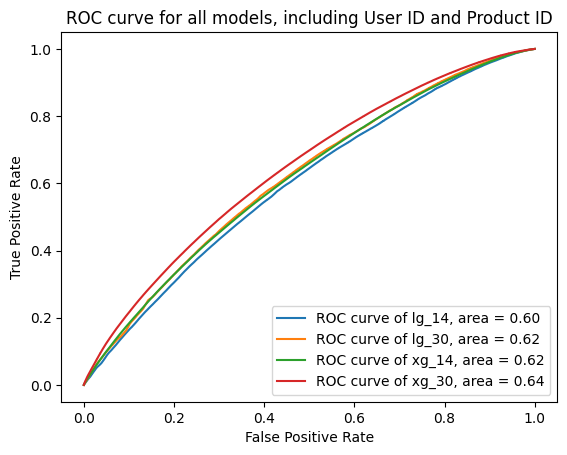

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(y_true, y_pred, label):
    false_pos, true_pos, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(false_pos, true_pos)
    plt.plot(false_pos, true_pos, label=f'ROC curve of {label}, area = %0.2f' % roc_auc)

plot_roc(y_14, lg_14_probs, 'lg_14')
plot_roc(y_30, lg_30_probs, 'lg_30')
plot_roc(y_14, xg_14_probs, 'xg_14')
plot_roc(y_30, xg_30_probs, 'xg_30')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve for all models, including User ID and Product ID')
plt.show()